In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 16})

In [2]:
dist_ct_arb = pd.read_pickle("./logs/dist/dist_log_ct_arb.pickle")
dist_ct_real = pd.read_pickle("./logs/dist/dist_log_ct_real.pickle")

dist_ut_arb = pd.read_pickle("./logs/dist/dist_log_ut_arb.pickle")
dist_ut_real = pd.read_pickle("./logs/dist/dist_log_ut_real.pickle")

dist_lmd_arb = pd.read_pickle("./logs/dist/dist_log_lmd_arb.pickle")
dist_lmd_real = pd.read_pickle("./logs/dist/dist_log_lmd_real.pickle")

night_ct_arb = pd.read_pickle("./logs/night/night_log_ct_arb.pickle")
night_ct_real = pd.read_pickle("./logs/night/night_log_ct_real.pickle")

night_ut_arb = pd.read_pickle("./logs/night/night_log_ut_arb.pickle")
night_ut_real = pd.read_pickle("./logs/night/night_log_ut_real.pickle")

night_lmd_arb = pd.read_pickle("./logs/night/night_log_lmd_arb.pickle")
night_lmd_real = pd.read_pickle("./logs/night/night_log_lmd_real.pickle")

dumb_ct_arb = pd.read_pickle("./logs/dumb/dumb_ct_arb.pickle")
dumb_ct_real = pd.read_pickle("./logs/dumb/dumb_ct_real.pickle")

dumb_ut_arb = pd.read_pickle("./logs/dumb/dumb_ut_arb.pickle")
dumb_ut_real = pd.read_pickle("./logs/dumb/dumb_ut_real.pickle")

dumb_lmd_arb = pd.read_pickle("./logs/dumb/dumb_lmd_arb.pickle")
dumb_lmd_real = pd.read_pickle("./logs/dumb/dumb_lmd_real.pickle")

lin_ct_arb = pd.read_pickle("./logs/lin/ct_arb_lin_log.pickle")
lin_ct_real = pd.read_pickle("./logs/lin/ct_real_lin_log.pickle")

lin_ut_arb = pd.read_pickle("./logs/lin/ut_arb_lin_log.pickle")
lin_ut_real = pd.read_pickle("./logs/lin/ut_real_lin_log.pickle")

lin_lmd_arb = pd.read_pickle("./logs/lin/lmd_arb_lin_log.pickle")
lin_lmd_real = pd.read_pickle("./logs/lin/lmd_real_lin_log.pickle")

rl_ct_arb = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul_25_new/PPO_final_ct_arb.pickle")
rl_ct_real = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul_25_new/PPO_final_ct_real.pickle")

rl_ut_arb = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul_25_new/PPO_final_ut_arb.pickle")
rl_ut_real = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul_25_new/PPO_final_ut_real.pickle")

rl_lmd_arb = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul_25_new/PPO_final_lmd_arb.pickle")
rl_lmd_real = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul_25_new/PPO_final_lmd_real.pickle")

In [3]:
rl_ct_arb = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul19_all/PPO_final_ct_arb.pickle")
rl_ct_real = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul19_all/PPO_final_ct_real.pickle")

rl_ut_arb = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul19_all/PPO_final_ut_arb.pickle")
rl_ut_real = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul19_all/PPO_final_ut_real.pickle")

rl_lmd_arb = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul19_all/PPO_final_lmd_arb.pickle")
rl_lmd_real = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul19_all/PPO_final_lmd_real.pickle")

In [3]:
for i in range(dist_ct_arb.__len__()):
    dist_ct_arb.loc[i, "hour_id"] = (dist_ct_arb.loc[i, "Time"].hour + dist_ct_arb.loc[i, "Time"].minute / 60)
    dist_ut_arb.loc[i, "hour_id"] = (dist_ut_arb.loc[i, "Time"].hour + dist_ut_arb.loc[i, "Time"].minute / 60)
    dist_lmd_arb.loc[i, "hour_id"] = (dist_lmd_arb.loc[i, "Time"].hour + dist_lmd_arb.loc[i, "Time"].minute / 60)

mean_per_hid_dist_ct_arb = dist_ct_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dist_ut_arb = dist_ut_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dist_lmd_arb = dist_lmd_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_dist_ct_arb = []
mean_all_dist_ut_arb = []
mean_all_dist_lmd_arb = []

for i in range(mean_per_hid_dist_ct_arb.__len__()):
    mean_all_dist_ct_arb.append(np.mean(mean_per_hid_dist_ct_arb[i]))
    mean_all_dist_ut_arb.append(np.mean(mean_per_hid_dist_ut_arb[i]))
    mean_all_dist_lmd_arb.append(np.mean(mean_per_hid_dist_lmd_arb[i]))

mean_dist_ct_arb = pd.DataFrame()
mean_dist_ut_arb = pd.DataFrame()
mean_dist_lmd_arb = pd.DataFrame()

mean_dist_ct_arb["Distributed charging"] = np.multiply(mean_all_dist_ct_arb, 4)
mean_dist_ut_arb["Distributed charging"] = np.multiply(mean_all_dist_ut_arb, 4)
mean_dist_lmd_arb["Distributed charging"] = np.multiply(mean_all_dist_lmd_arb, 4)

for i in range(dist_ct_real.__len__()):
    dist_ct_real.loc[i, "hour_id"] = (dist_ct_real.loc[i, "Time"].hour + dist_ct_real.loc[i, "Time"].minute / 60)
    dist_ut_real.loc[i, "hour_id"] = (dist_ut_real.loc[i, "Time"].hour + dist_ut_real.loc[i, "Time"].minute / 60)
    dist_lmd_real.loc[i, "hour_id"] = (dist_lmd_real.loc[i, "Time"].hour + dist_lmd_real.loc[i, "Time"].minute / 60)

mean_per_hid_dist_ct_real = dist_ct_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dist_ut_real = dist_ut_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dist_lmd_real = dist_lmd_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_dist_ct_real = []
mean_all_dist_ut_real = []
mean_all_dist_lmd_real = []

for i in range(mean_per_hid_dist_ct_real.__len__()):
    mean_all_dist_ct_real.append(np.mean(mean_per_hid_dist_ct_real[i]))
    mean_all_dist_ut_real.append(np.mean(mean_per_hid_dist_ut_real[i]))
    mean_all_dist_lmd_real.append(np.mean(mean_per_hid_dist_lmd_real[i]))

mean_dist_ct_real = pd.DataFrame()
mean_dist_ut_real = pd.DataFrame()
mean_dist_lmd_real = pd.DataFrame()

mean_dist_ct_real["Distributed charging"] = np.multiply(mean_all_dist_ct_real, 4)
mean_dist_ut_real["Distributed charging"] = np.multiply(mean_all_dist_ut_real, 4)
mean_dist_lmd_real["Distributed charging"] = np.multiply(mean_all_dist_lmd_real, 4)


In [4]:
real_power_night = []
for i in range(night_ct_arb.__len__()):
    night_ct_arb.loc[i, "hour_id"] = (night_ct_arb.loc[i, "Time"].hour + night_ct_arb.loc[i, "Time"].minute / 60)
    night_ut_arb.loc[i, "hour_id"] = (night_ut_arb.loc[i, "Time"].hour + night_ut_arb.loc[i, "Time"].minute / 60)
    night_lmd_arb.loc[i, "hour_id"] = (night_lmd_arb.loc[i, "Time"].hour + night_lmd_arb.loc[i, "Time"].minute / 60)

mean_per_hid_night_ct_arb = night_ct_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_night_ut_arb = night_ut_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_night_lmd_arb = night_lmd_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_night_ct_arb = []
mean_all_night_ut_arb = []
mean_all_night_lmd_arb = []

for i in range(mean_per_hid_night_ct_arb.__len__()):
    mean_all_night_ct_arb.append(np.mean(mean_per_hid_night_ct_arb[i]))
    mean_all_night_ut_arb.append(np.mean(mean_per_hid_night_ut_arb[i]))
    mean_all_night_lmd_arb.append(np.mean(mean_per_hid_night_lmd_arb[i]))

mean_night_ct_arb = pd.DataFrame()
mean_night_ut_arb = pd.DataFrame()
mean_night_lmd_arb = pd.DataFrame()

mean_night_ct_arb["night charging"] = np.multiply(mean_all_night_ct_arb, 4)
mean_night_ut_arb["night charging"] = np.multiply(mean_all_night_ut_arb, 4)
mean_night_lmd_arb["night charging"] = np.multiply(mean_all_night_lmd_arb, 4)


for i in range(night_ct_real.__len__()):
    night_ct_real.loc[i, "hour_id"] = (night_ct_real.loc[i, "Time"].hour + night_ct_real.loc[i, "Time"].minute / 60)
    night_ut_real.loc[i, "hour_id"] = (night_ut_real.loc[i, "Time"].hour + night_ut_real.loc[i, "Time"].minute / 60)
    night_lmd_real.loc[i, "hour_id"] = (night_lmd_real.loc[i, "Time"].hour + night_lmd_real.loc[i, "Time"].minute / 60)

mean_per_hid_night_ct_real = night_ct_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_night_ut_real = night_ut_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_night_lmd_real = night_lmd_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_night_ct_real = []
mean_all_night_ut_real = []
mean_all_night_lmd_real = []

for i in range(mean_per_hid_night_ct_real.__len__()):
    mean_all_night_ct_real.append(np.mean(mean_per_hid_night_ct_real[i]))
    mean_all_night_ut_real.append(np.mean(mean_per_hid_night_ut_real[i]))
    mean_all_night_lmd_real.append(np.mean(mean_per_hid_night_lmd_real[i]))

mean_night_ct_real = pd.DataFrame()
mean_night_ut_real = pd.DataFrame()
mean_night_lmd_real = pd.DataFrame()

mean_night_ct_real["night charging"] = np.multiply(mean_all_night_ct_real, 4)
mean_night_ut_real["night charging"] = np.multiply(mean_all_night_ut_real, 4)
mean_night_lmd_real["night charging"] = np.multiply(mean_all_night_lmd_real, 4)

In [5]:
for i in range(dumb_ct_arb.__len__()):
    dumb_ct_arb.loc[i, "hour_id"] = (dumb_ct_arb.loc[i, "Time"].hour + dumb_ct_arb.loc[i, "Time"].minute / 60)
    dumb_ut_arb.loc[i, "hour_id"] = (dumb_ut_arb.loc[i, "Time"].hour + dumb_ut_arb.loc[i, "Time"].minute / 60)
    dumb_lmd_arb.loc[i, "hour_id"] = (dumb_lmd_arb.loc[i, "Time"].hour + dumb_lmd_arb.loc[i, "Time"].minute / 60)

mean_per_hid_dumb_ct_arb = dumb_ct_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dumb_ut_arb = dumb_ut_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dumb_lmd_arb = dumb_lmd_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_dumb_ct_arb = []
mean_all_dumb_ut_arb = []
mean_all_dumb_lmd_arb = []

for i in range(mean_per_hid_dumb_ct_arb.__len__()):
    mean_all_dumb_ct_arb.append(np.mean(mean_per_hid_dumb_ct_arb[i]))
    mean_all_dumb_ut_arb.append(np.mean(mean_per_hid_dumb_ut_arb[i]))
    mean_all_dumb_lmd_arb.append(np.mean(mean_per_hid_dumb_lmd_arb[i]))

mean_dumb_ct_arb = pd.DataFrame()
mean_dumb_ut_arb = pd.DataFrame()
mean_dumb_lmd_arb = pd.DataFrame()

mean_dumb_ct_arb["dumb charging"] = np.multiply(mean_all_dumb_ct_arb, 4)
mean_dumb_ut_arb["dumb charging"] = np.multiply(mean_all_dumb_ut_arb, 4)
mean_dumb_lmd_arb["dumb charging"] = np.multiply(mean_all_dumb_lmd_arb, 4)

for i in range(dumb_ct_real.__len__()):
    dumb_ct_real.loc[i, "hour_id"] = (dumb_ct_real.loc[i, "Time"].hour + dumb_ct_real.loc[i, "Time"].minute / 60)
    dumb_ut_real.loc[i, "hour_id"] = (dumb_ut_real.loc[i, "Time"].hour + dumb_ut_real.loc[i, "Time"].minute / 60)
    dumb_lmd_real.loc[i, "hour_id"] = (dumb_lmd_real.loc[i, "Time"].hour + dumb_lmd_real.loc[i, "Time"].minute / 60)

mean_per_hid_dumb_ct_real = dumb_ct_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dumb_ut_real = dumb_ut_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dumb_lmd_real = dumb_lmd_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_dumb_ct_real = []
mean_all_dumb_ut_real = []
mean_all_dumb_lmd_real = []

for i in range(mean_per_hid_dumb_ct_real.__len__()):
    mean_all_dumb_ct_real.append(np.mean(mean_per_hid_dumb_ct_real[i]))
    mean_all_dumb_ut_real.append(np.mean(mean_per_hid_dumb_ut_real[i]))
    mean_all_dumb_lmd_real.append(np.mean(mean_per_hid_dumb_lmd_real[i]))

mean_dumb_ct_real = pd.DataFrame()
mean_dumb_ut_real = pd.DataFrame()
mean_dumb_lmd_real = pd.DataFrame()

mean_dumb_ct_real["dumb charging"] = np.multiply(mean_all_dumb_ct_real, 4)
mean_dumb_ut_real["dumb charging"] = np.multiply(mean_all_dumb_ut_real, 4)
mean_dumb_lmd_real["dumb charging"] = np.multiply(mean_all_dumb_lmd_real, 4)

In [6]:
for i in range(lin_ct_arb.__len__()):
    lin_ct_arb.loc[i, "hour_id"] = (lin_ct_arb.loc[i, "Time"].hour + lin_ct_arb.loc[i, "Time"].minute / 60)
    lin_ut_arb.loc[i, "hour_id"] = (lin_ut_arb.loc[i, "Time"].hour + lin_ut_arb.loc[i, "Time"].minute / 60)
    lin_lmd_arb.loc[i, "hour_id"] = (lin_lmd_arb.loc[i, "Time"].hour + lin_lmd_arb.loc[i, "Time"].minute / 60)

mean_per_hid_lin_ct_arb = lin_ct_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_lin_ut_arb = lin_ut_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_lin_lmd_arb = lin_lmd_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_lin_ct_arb = []
mean_all_lin_ut_arb = []
mean_all_lin_lmd_arb = []

for i in range(mean_per_hid_lin_ct_arb.__len__()):
    mean_all_lin_ct_arb.append(np.mean(mean_per_hid_lin_ct_arb[i]))
    mean_all_lin_ut_arb.append(np.mean(mean_per_hid_lin_ut_arb[i]))
    mean_all_lin_lmd_arb.append(np.mean(mean_per_hid_lin_lmd_arb[i]))

mean_lin_ct_arb = pd.DataFrame()
mean_lin_ut_arb = pd.DataFrame()
mean_lin_lmd_arb = pd.DataFrame()

mean_lin_ct_arb["lin charging"] = np.multiply(mean_all_lin_ct_arb, 4)
mean_lin_ut_arb["lin charging"] = np.multiply(mean_all_lin_ut_arb, 4)
mean_lin_lmd_arb["lin charging"] = np.multiply(mean_all_lin_lmd_arb, 4)

In [7]:
for i in range(lin_ct_real.__len__()):
    lin_ct_real.loc[i, "hour_id"] = (lin_ct_real.loc[i, "Time"].hour + lin_ct_real.loc[i, "Time"].minute / 60)
    lin_ut_real.loc[i, "hour_id"] = (lin_ut_real.loc[i, "Time"].hour + lin_ut_real.loc[i, "Time"].minute / 60)
    lin_lmd_real.loc[i, "hour_id"] = (lin_lmd_real.loc[i, "Time"].hour + lin_lmd_real.loc[i, "Time"].minute / 60)

mean_per_hid_lin_ct_real = lin_ct_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_lin_ut_real = lin_ut_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_lin_lmd_real = lin_lmd_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_lin_ct_real = []
mean_all_lin_ut_real = []
mean_all_lin_lmd_real = []

for i in range(mean_per_hid_lin_ct_real.__len__()):
    mean_all_lin_ct_real.append(np.mean(mean_per_hid_lin_ct_real[i]))
    mean_all_lin_ut_real.append(np.mean(mean_per_hid_lin_ut_real[i]))
    mean_all_lin_lmd_real.append(np.mean(mean_per_hid_lin_lmd_real[i]))

mean_lin_ct_real = pd.DataFrame()
mean_lin_ut_real = pd.DataFrame()
mean_lin_lmd_real = pd.DataFrame()

mean_lin_ct_real["lin charging"] = np.multiply(mean_all_lin_ct_real, 4)
mean_lin_ut_real["lin charging"] = np.multiply(mean_all_lin_ut_real, 4)
mean_lin_lmd_real["lin charging"] = np.multiply(mean_all_lin_lmd_real, 4)

In [8]:
for i in range(rl_ct_arb.__len__()):
    rl_ct_arb.loc[i, "hour_id"] = (rl_ct_arb.loc[i, "Time"].hour + rl_ct_arb.loc[i, "Time"].minute / 60)
    rl_ut_arb.loc[i, "hour_id"] = (rl_ut_arb.loc[i, "Time"].hour + rl_ut_arb.loc[i, "Time"].minute / 60)
    rl_lmd_arb.loc[i, "hour_id"] = (rl_lmd_arb.loc[i, "Time"].hour + rl_lmd_arb.loc[i, "Time"].minute / 60)

mean_per_hid_rl_ct_arb = rl_ct_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_rl_ut_arb = rl_ut_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_rl_lmd_arb = rl_lmd_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_rl_ct_arb = []
mean_all_rl_ut_arb = []
mean_all_rl_lmd_arb = []

for i in range(mean_per_hid_rl_ct_arb.__len__()):
    mean_all_rl_ct_arb.append(np.mean(mean_per_hid_rl_ct_arb[i]))
    mean_all_rl_ut_arb.append(np.mean(mean_per_hid_rl_ut_arb[i]))
    mean_all_rl_lmd_arb.append(np.mean(mean_per_hid_rl_lmd_arb[i]))

mean_rl_ct_arb = pd.DataFrame()
mean_rl_ut_arb = pd.DataFrame()
mean_rl_lmd_arb = pd.DataFrame()

mean_rl_ct_arb["rl charging"] = np.multiply(mean_all_rl_ct_arb, 4)
mean_rl_ut_arb["rl charging"] = np.multiply(mean_all_rl_ut_arb, 4)
mean_rl_lmd_arb["rl charging"] = np.multiply(mean_all_rl_lmd_arb, 4)

In [9]:
for i in range(rl_ct_real.__len__()):
    rl_ct_real.loc[i, "hour_id"] = (rl_ct_real.loc[i, "Time"].hour + rl_ct_real.loc[i, "Time"].minute / 60)
    rl_ut_real.loc[i, "hour_id"] = (rl_ut_real.loc[i, "Time"].hour + rl_ut_real.loc[i, "Time"].minute / 60)
    rl_lmd_real.loc[i, "hour_id"] = (rl_lmd_real.loc[i, "Time"].hour + rl_lmd_real.loc[i, "Time"].minute / 60)

mean_per_hid_rl_ct_real = rl_ct_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_rl_ut_real = rl_ut_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_rl_lmd_real = rl_lmd_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_rl_ct_real = []
mean_all_rl_ut_real = []
mean_all_rl_lmd_real = []

for i in range(mean_per_hid_rl_ct_real.__len__()):
    mean_all_rl_ct_real.append(np.mean(mean_per_hid_rl_ct_real[i]))
    mean_all_rl_ut_real.append(np.mean(mean_per_hid_rl_ut_real[i]))
    mean_all_rl_lmd_real.append(np.mean(mean_per_hid_rl_lmd_real[i]))

mean_rl_ct_real = pd.DataFrame()
mean_rl_ut_real = pd.DataFrame()
mean_rl_lmd_real = pd.DataFrame()

mean_rl_ct_real["rl charging"] = np.multiply(mean_all_rl_ct_real, 4)
mean_rl_ut_real["rl charging"] = np.multiply(mean_all_rl_ut_real, 4)
mean_rl_lmd_real["rl charging"] = np.multiply(mean_all_rl_lmd_real, 4)

In [ ]:
(fig, ax) = plt.subplots(3,2, figsize=(8,8))  # Changed subplot arrangement to 3 rows and 2 columns





# First plot
mean_dumb_ct_arb.plot(ax = ax[0,0])
mean_dumb_ut_arb.plot(ax = ax[0,0])
mean_dumb_lmd_arb.plot(ax = ax[0,0])

ax[0,0].legend(["CT", "UT", "LMD"])
ax[0,0].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[0,0].grid(alpha=0.2)
ax[0,0].set_ylabel("Charging power in kW")
ax[0,0].set_ylim([0, 11])
ax[0,0].set_title("Dumb charging")


# Second plot
mean_dist_ct_arb.plot(ax = ax[0,1], legend=False)
mean_dist_ut_arb.plot(ax = ax[0,1], legend=False)
mean_dist_lmd_arb.plot(ax = ax[0,1], legend=False)

ax[0,1].legend(["CT", "UT", "LMD"], loc="upper left")
ax[0,1].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[0,1].grid(alpha=0.2)
ax[0,1].set_ylabel("Charging power in kW")
ax[0,1].set_ylim([0, 11])
ax[0,1].set_title("Distributed charging")


# Third plot
mean_lin_ct_arb.plot(ax = ax[1,0], legend=False)
mean_lin_ut_arb.plot(ax = ax[1,0], legend=False)
mean_lin_lmd_arb.plot(ax = ax[1,0], legend=False)

#ax[1,0].legend(["CT", "UT", "LMD"])
ax[1,0].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[1,0].grid(alpha=0.2)
ax[1,0].set_ylabel("Charging power in kW")
ax[1,0].set_ylim([-7, 7])
ax[1,0].set_title("LP arbitrage")


# Fourth plot
mean_lin_ct_real.plot(ax = ax[1,1], legend=False)
mean_lin_ut_real.plot(ax = ax[1,1], legend=False)
mean_lin_lmd_real.plot(ax = ax[1,1], legend=False)

#ax[1,1].legend(["CT", "UT", "LMD"])
ax[1,1].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[1,1].grid(alpha=0.2)
ax[1,1].set_ylabel("Charging power in kW")
ax[1,1].set_ylim([-7, 7])
ax[1,1].set_title("LP realistic")


# Fifth plot
mean_rl_ct_arb.plot(ax = ax[2,0], legend=False)
mean_rl_ut_arb.plot(ax = ax[2,0], legend=False)
mean_rl_lmd_arb.plot(ax = ax[2,0], legend=False)

#ax[2,0].legend(["CT", "UT", "LMD"])
ax[2,0].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[2,0].grid(alpha=0.2)
ax[2,0].set_ylabel("Charging power in kW")
ax[2,0].set_ylim([-15, 15])
ax[2,0].set_title("RL arbitrage")


# Sixth plot
mean_rl_ct_real.plot(ax = ax[2,1], legend=False)
mean_rl_ut_real.plot(ax = ax[2,1], legend=False)
mean_rl_lmd_real.plot(ax = ax[2,1], legend=False)

#ax[2,1].legend(["CT", "UT", "LMD"])
ax[2,1].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[2,1].grid(alpha=0.2)
ax[2,1].set_ylabel("Charging power in kW")
ax[2,1].set_ylim([-15, 15])
ax[2,1].set_title("RL realistic")


plt.tight_layout()
plt.show()


In [ ]:
(fig, ax) = plt.subplots(2,2, figsize=(8,8))  # Changed subplot arrangement to 3 rows and 2 columns

# Third plot
mean_lin_ct_arb.plot(ax = ax[0,0], legend=False)
mean_lin_ut_arb.plot(ax = ax[0,0], legend=False)
mean_lin_lmd_arb.plot(ax = ax[0,0], legend=False)

ax[0,0].legend(["CT", "UT", "LMD"])
ax[0,0].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[0,0].grid(alpha=0.2)
ax[0,0].set_ylabel("Charging power in kW")
ax[0,0].set_ylim([-7, 7])
ax[0,0].set_title("LP arbitrage")


# Fourth plot
mean_lin_ct_real.plot(ax = ax[0,1], legend=False)
mean_lin_ut_real.plot(ax = ax[0,1], legend=False)
mean_lin_lmd_real.plot(ax = ax[0,1], legend=False)

ax[0,1].legend(["CT", "UT", "LMD"])
ax[0,1].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[0,1].grid(alpha=0.2)
ax[0,1].set_ylabel("Charging power in kW")
ax[0,1].set_ylim([-7, 7])
ax[0,1].set_title("LP realistic")


# Fifth plot
mean_rl_ct_arb.plot(ax = ax[1,0], legend=False)
mean_rl_ut_arb.plot(ax = ax[1,0], legend=False)
mean_rl_lmd_arb.plot(ax = ax[1,0], legend=False)

#ax[2,0].legend(["CT", "UT", "LMD"])
ax[1,0].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[1,0].grid(alpha=0.2)
ax[1,0].set_ylabel("Charging power in kW")
ax[1,0].set_ylim([-15, 15])
ax[1,0].set_title("RL arbitrage")


# Sixth plot
mean_rl_ct_real.plot(ax = ax[1,1], legend=False)
mean_rl_ut_real.plot(ax = ax[1,1], legend=False)
mean_rl_lmd_real.plot(ax = ax[1,1], legend=False)

#ax[2,1].legend(["CT", "UT", "LMD"])
ax[1,1].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[1,1].grid(alpha=0.2)
ax[1,1].set_ylabel("Charging power in kW")
ax[1,1].set_ylim([-15, 15])
ax[1,1].set_title("RL realistic")


plt.tight_layout()
plt.show()


In [10]:
min_missing = dumb_ct_arb["SOC violation"].sum()
avg_price = dumb_ct_arb["Observation"].mean()[4]

cashflow_comp_ct = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "RL", "LP"] * 2,
    'Case': ['Arbitrage']*5 + ['Realistic']*5,
    'Cashflow': [
        dumb_ct_arb["Cashflow"].sum() + (min_missing - dumb_ct_arb["SOC violation"].sum()) * 16.7 * avg_price/1000,
        dist_ct_arb["Cashflow"].sum() + (min_missing - dist_ct_arb["SOC violation"].sum()) * 16.7 * avg_price/1000,
        night_ct_arb["Cashflow"].sum() + (min_missing - night_ct_arb["SOC violation"].sum()) * 16.7 * avg_price/1000,
        rl_ct_arb["Cashflow"].sum() + (min_missing - rl_ct_arb["SOC violation"].sum()) * 16.7 * avg_price/1000,
        lin_ct_arb["Cashflow"].sum() + (min_missing - lin_ct_arb["SOC violation"].sum()) * 16.7 * avg_price/1000,
        dumb_ct_real["Cashflow"].sum() + (min_missing - dumb_ct_real["SOC violation"].sum()) * 16.7 * avg_price/1000,
        dist_ct_real["Cashflow"].sum() + (min_missing - dist_ct_real["SOC violation"].sum()) * 16.7 * avg_price/1000,
        night_ct_real["Cashflow"].sum() + (min_missing - night_ct_real["SOC violation"].sum()) * 16.7 * avg_price/1000,
        rl_ct_real["Cashflow"].sum() + (min_missing - rl_ct_real["SOC violation"].sum()) * 16.7 * avg_price/1000,
        lin_ct_real["Cashflow"].sum() + (min_missing - lin_ct_real["SOC violation"].sum()) * 16.7 * avg_price/1000
    ]
})


In [11]:
min_missing = dumb_ct_arb["SOC violation"].sum()
avg_price = dumb_ct_arb["Observation"].mean()[4]

cashflow_comp_ut = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "RL", "LP"] * 2,
    'Case': ['Arbitrage']*5 + ['Realistic']*5,
    'Cashflow': [
        dumb_ut_arb["Cashflow"].sum() + (min_missing - dumb_ut_arb["SOC violation"].sum()) * 50 * avg_price/1000,
        dist_ut_arb["Cashflow"].sum() + (min_missing - dist_ut_arb["SOC violation"].sum()) * 50 * avg_price/1000,
        night_ut_arb["Cashflow"].sum() + (min_missing - night_ut_arb["SOC violation"].sum()) * 50 * avg_price/1000,
        rl_ut_arb["Cashflow"].sum() + (min_missing - rl_ut_arb["SOC violation"].sum()) * 50 * avg_price/1000,
        lin_ut_arb["Cashflow"].sum() + (min_missing - lin_ut_arb["SOC violation"].sum()) * 50 * avg_price/1000,
        dumb_ut_real["Cashflow"].sum() + (min_missing - dumb_ut_real["SOC violation"].sum()) * 50 * avg_price/1000,
        dist_ut_real["Cashflow"].sum() + (min_missing - dist_ut_real["SOC violation"].sum()) * 50 * avg_price/1000,
        night_ut_real["Cashflow"].sum() + (min_missing - night_ut_real["SOC violation"].sum()) * 50 * avg_price/1000,
        rl_ut_real["Cashflow"].sum() + (min_missing - rl_ut_real["SOC violation"].sum()) * 50 * avg_price/1000,
        lin_ut_real["Cashflow"].sum() + (min_missing - lin_ut_real["SOC violation"].sum()) * 50 * avg_price/1000
    ]
})

In [12]:
min_missing = dumb_ct_arb["SOC violation"].sum()
avg_price = dumb_ct_arb["Observation"].mean()[4]

cashflow_comp_lmd = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "RL", "LP"] * 2,
    'Case': ['Arbitrage']*5 + ['Realistic']*5,
    'Cashflow': [
        dumb_lmd_arb["Cashflow"].sum() + (min_missing - dumb_lmd_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        dist_lmd_arb["Cashflow"].sum() + (min_missing - dist_lmd_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        night_lmd_arb["Cashflow"].sum() + (min_missing - night_lmd_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        rl_lmd_arb["Cashflow"].sum() + (min_missing - rl_lmd_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        lin_lmd_arb["Cashflow"].sum() + (min_missing - lin_lmd_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        dumb_lmd_real["Cashflow"].sum() + (min_missing - dumb_lmd_real["SOC violation"].sum()) * 60 * avg_price/1000,
        dist_lmd_real["Cashflow"].sum() + (min_missing - dist_lmd_real["SOC violation"].sum()) * 60 * avg_price/1000,
        night_lmd_real["Cashflow"].sum() + (min_missing - night_lmd_real["SOC violation"].sum()) * 60 * avg_price/1000,
        rl_lmd_real["Cashflow"].sum() + (min_missing - rl_lmd_real["SOC violation"].sum()) * 60 * avg_price/1000,
        lin_lmd_real["Cashflow"].sum() + (min_missing - lin_lmd_real["SOC violation"].sum()) * 60 * avg_price/1000
    ]
})

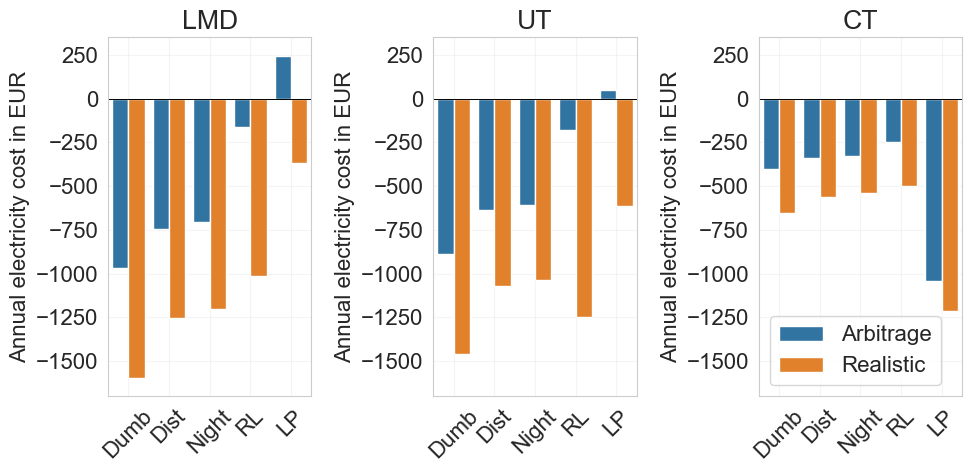

In [34]:
(fig, ax) = plt.subplots(1,3, figsize=(10,5))
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_lmd, ax=ax[0])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_ut, ax=ax[1])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_ct, ax=ax[2])

ax[0].set_ylim([-1800, 350])
ax[0].grid(alpha=0.2)
ax[0].title.set_text("LMD")
ax[0].axhline(0, color='black', linewidth=0.7)
ax[0].get_legend().remove()



ax[1].set_ylim([-1800, 350])
ax[1].grid(alpha=0.2)
ax[1].get_legend().remove()
ax[1].set_ylabel("")
ax[1].title.set_text("UT")
ax[1].axhline(0, color='black', linewidth=0.7)

#ax[1].set_yticklabels("")
ax[2].grid(alpha=0.2)
ax[2].get_legend().remove()
ax[2].set_ylabel("")
ax[2].title.set_text("CT")
ax[2].axhline(0, color='black', linewidth=0.7)
ax[2].legend(loc="lower left")

for i in range(3):
    ax[i].set_xlabel("")
    ax[i].set_ylabel("Annual electricity cost in EUR")
    ax[i].set_xticks([0,1,2,3,4],["Dumb", "Dist", "Night", "RL", "LP"], rotation=45)
    ax[i].set_yticks([-1500, -1250, -1000, -750, -500, -250, 0, 250])
    ax[i].set_ylim([-1700, 350])




plt.tight_layout()
plt.savefig("absolute_results_ppo.pdf")
plt.show()

In [24]:
(fig, ax) = plt.subplots(1,3, figsize=(8,4))
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_lmd, ax=ax[0])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_ut, ax=ax[1])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_ct, ax=ax[2])

ax[0].set_ylim([-1700, 350])
ax[0].grid(alpha=0.2)
ax[0].legend(loc="lower right")
ax[0].title.set_text("LMD")
ax[0].axhline(0, color='black', linewidth=0.7)



ax[1].set_ylim([-1700, 350])
ax[1].grid(alpha=0.2)
ax[1].get_legend().remove()
ax[1].set_ylabel("")
ax[1].title.set_text("UT")
ax[1].axhline(0, color='black', linewidth=0.7)

#ax[1].set_yticklabels("")
ax[2].set_ylim([-1700, 350])
ax[2].grid(alpha=0.2)
ax[2].get_legend().remove()
ax[2].set_ylabel("")
ax[2].title.set_text("CT")
ax[2].axhline(0, color='black', linewidth=0.7)


plt.tight_layout()
plt.savefig("test.pdf")
plt.show()

In [13]:
min_missing = dumb_ct_arb["SOC violation"].sum()
avg_price = dumb_ct_arb["Observation"].mean()[4]
rl_arb = rl_lmd_arb["Cashflow"].sum() + (min_missing - rl_lmd_arb["SOC violation"].sum()) * 60 * avg_price / 1000
rl_real = rl_lmd_real["Cashflow"].sum() + (min_missing - rl_lmd_real["SOC violation"].sum()) * 60 * avg_price / 1000


rel_cashflow_comp_lmd = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "LP"] * 2,
    'Case': ['Arbitrage'] * 4 + ['Realistic'] * 4,
    'Cashflow': [
        rl_arb - (dumb_lmd_arb["Cashflow"].sum() + (min_missing - dumb_lmd_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_arb - (dist_lmd_arb["Cashflow"].sum() + (min_missing - dist_lmd_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_arb - (night_lmd_arb["Cashflow"].sum() + (min_missing - night_lmd_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_arb - (lin_lmd_arb["Cashflow"].sum() + (min_missing - lin_lmd_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (dumb_lmd_real["Cashflow"].sum() + (min_missing - dumb_lmd_real["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (dist_lmd_real["Cashflow"].sum() + (min_missing - dist_lmd_real["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (night_lmd_real["Cashflow"].sum() + (
                    min_missing - night_lmd_real["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (lin_lmd_real["Cashflow"].sum() + (min_missing - lin_lmd_real["SOC violation"].sum()) * 60 * avg_price / 1000)
    ]
})

In [14]:
min_missing = dumb_ct_arb["SOC violation"].sum()
avg_price = dumb_ct_arb["Observation"].mean()[4]

rl_arb = rl_ut_arb["Cashflow"].sum() + (min_missing - rl_ut_arb["SOC violation"].sum()) * 50 * avg_price / 1000

rl_real = rl_ut_real["Cashflow"].sum() + (min_missing - rl_ut_real["SOC violation"].sum()) * 50 * avg_price / 1000


rel_cashflow_comp_ut = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "LP"] * 2,
    'Case': ['Arbitrage'] * 4 + ['Realistic'] * 4,
    'Cashflow': [
        rl_arb - (dumb_ut_arb["Cashflow"].sum() + (min_missing - dumb_ut_arb["SOC violation"].sum()) * 50 * avg_price / 1000),
        rl_arb - (dist_ut_arb["Cashflow"].sum() + (min_missing - dist_ut_arb["SOC violation"].sum()) * 50 * avg_price / 1000),
        rl_arb - (night_ut_arb["Cashflow"].sum() + (min_missing - night_ut_arb["SOC violation"].sum()) * 50 * avg_price / 1000),
        rl_arb - (lin_ut_arb["Cashflow"].sum() + (min_missing - lin_ut_arb["SOC violation"].sum()) * 50 * avg_price / 1000),
        (rl_real - (dumb_ut_real["Cashflow"].sum() + (min_missing - dumb_ut_real["SOC violation"].sum()) * 50 * avg_price / 1000)),
        rl_real - (dist_ut_real["Cashflow"].sum() + (min_missing - dist_ut_real["SOC violation"].sum()) * 50 * avg_price / 1000),
        rl_real - (night_ut_real["Cashflow"].sum() + (min_missing - night_ut_real["SOC violation"].sum()) * 50 * avg_price / 1000),
        rl_real - (lin_ut_real["Cashflow"].sum() + (min_missing - lin_ut_real["SOC violation"].sum()) * 50 * avg_price / 1000)
    ]
})

In [15]:
min_missing = dumb_ct_arb["SOC violation"].sum()
avg_price = dumb_ct_arb["Observation"].mean()[4]

rl_arb = rl_ct_arb["Cashflow"].sum() + (min_missing - rl_ct_arb["SOC violation"].sum()) * 16.7 * avg_price / 1000
rl_real = rl_ct_real["Cashflow"].sum() + (min_missing - rl_ct_real["SOC violation"].sum()) * 16.7 * avg_price / 1000


rel_cashflow_comp_ct = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "LP"] * 2,
    'Case': ['Arbitrage'] * 4 + ['Realistic'] * 4,
    'Cashflow': [
        rl_arb - (dumb_ct_arb["Cashflow"].sum() + (min_missing - dumb_ct_arb["SOC violation"].sum()) * 16.7 * avg_price / 1000),
        rl_arb - (dist_ct_arb["Cashflow"].sum() + (min_missing - dist_ct_arb["SOC violation"].sum()) * 16.7 * avg_price / 1000),
        rl_arb - (night_ct_arb["Cashflow"].sum() + (min_missing - night_ct_arb["SOC violation"].sum()) * 16.7 * avg_price / 1000),
        rl_arb - (lin_ct_arb["Cashflow"].sum() + (min_missing - lin_ct_arb["SOC violation"].sum()) * 16.7 * avg_price / 1000),
        rl_real - (dumb_ct_real["Cashflow"].sum() + (min_missing - dumb_ct_real["SOC violation"].sum()) * 16.7 * avg_price / 1000),
        rl_real - (dist_ct_real["Cashflow"].sum() + (min_missing - dist_ct_real["SOC violation"].sum()) * 16.7 * avg_price / 1000),
        rl_real - (night_ct_real["Cashflow"].sum() + (min_missing - night_ct_real["SOC violation"].sum()) * 16.7 * avg_price / 1000),
        rl_real - (lin_ct_real["Cashflow"].sum() + (min_missing - lin_ct_real["SOC violation"].sum()) * 16.7 * avg_price / 1000)
    ]
})

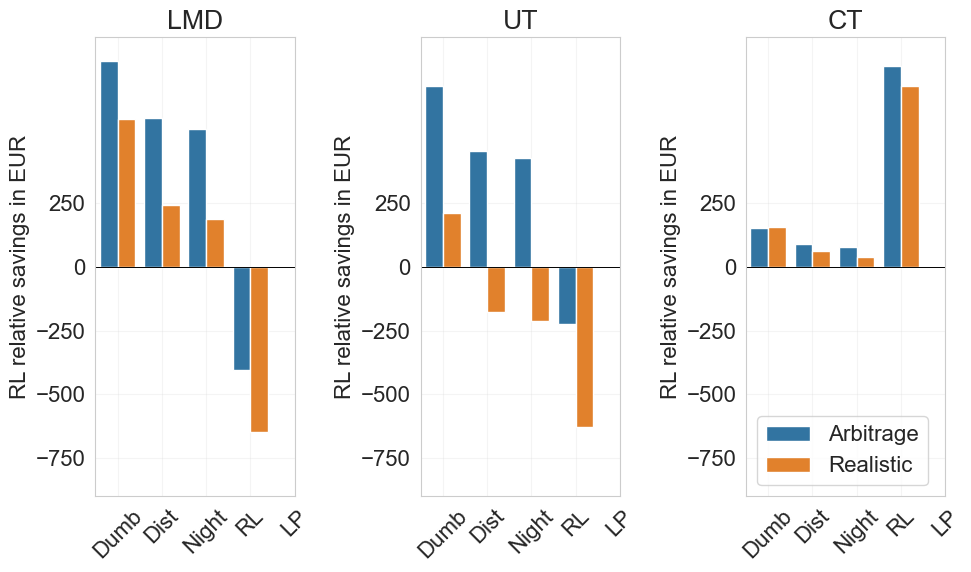

In [43]:
(fig, ax) = plt.subplots(1,3, figsize=(10,6))
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=rel_cashflow_comp_lmd, ax=ax[0])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=rel_cashflow_comp_ut, ax=ax[1])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=rel_cashflow_comp_ct, ax=ax[2])

ax[0].set_ylim([-900, 900])
ax[0].grid(alpha=0.2)
ax[0].legend(loc="lower left")
ax[0].title.set_text("LMD")
ax[0].axhline(0, color='black', linewidth=0.7)
ax[0].set_ylabel("RL relative savings in EUR")
ax[0].get_legend().remove()


ax[1].set_ylim([-900, 900])
ax[1].grid(alpha=0.2)
ax[1].get_legend().remove()
ax[1].set_ylabel("")
ax[1].title.set_text("UT")
ax[1].axhline(0, color='black', linewidth=0.7)
ax[1].set_ylabel("RL relative savings in EUR")


#ax[1].set_yticklabels("")
ax[2].set_ylim([-900, 900])
ax[2].grid(alpha=0.2)
ax[2].get_legend().remove()
ax[2].set_ylabel("")
ax[2].title.set_text("CT")
ax[2].axhline(0, color='black', linewidth=0.7)
ax[2].set_ylabel("RL relative savings in EUR")
ax[2].legend(loc="lower left")

for i in range(3):
    ax[i].set_xlabel("")
    #ax[i].set_ylabel("Annual electricity cost in EUR")
    ax[i].set_xticks([0,1,2,3,4],["Dumb", "Dist", "Night", "RL", "LP"], rotation=45)
    ax[i].set_yticks([-1500, -1250, -1000, -750, -500, -250, 0, 250])
    ax[i].set_ylim([-900, 900])

plt.tight_layout()
# plt.savefig("relative_results_ppo.pdf")
plt.show()

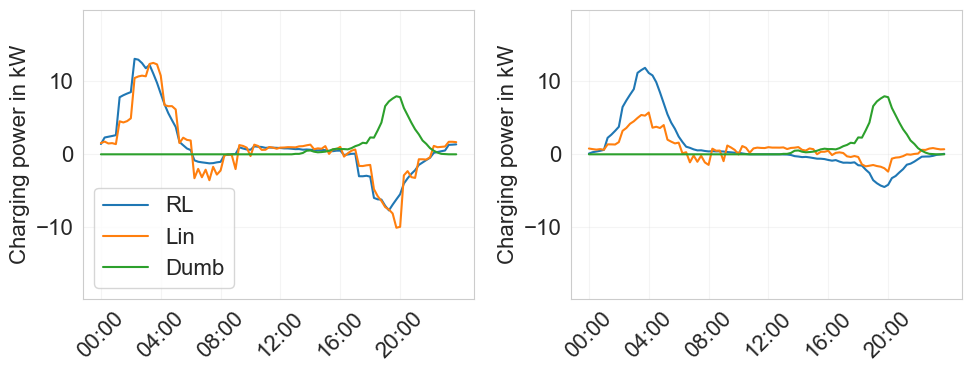

In [17]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(1,2, figsize=(10,4))
mean_rl_ut_arb.rolling(1).mean().plot(ax = ax[0], legend=False)
# mean_night_ut_arb.plot(ax = ax[0], legend=False)
# mean_dist_ut_arb.plot(ax = ax[0], legend=False)
mean_lin_ut_arb.rolling(1).mean().plot(ax = ax[0], legend=False)
mean_dumb_ut_arb.rolling(1).mean().plot(ax = ax[0], legend=False)

mean_rl_ut_real.rolling(1).mean().plot(ax=ax[1], legend=False)
# mean_night_ut_real.plot(ax = ax[1], legend=False)
# mean_dist_ut_real.plot(ax = ax[1], legend=False)
mean_lin_ut_real.rolling(1).mean().plot(ax = ax[1], legend=False)
mean_dumb_ut_real.rolling(1).mean().plot(ax = ax[1], legend=False)

# Define your ticks and labels
ticks = [0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88]
labels = ["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"]

# Only keep every second tick and label
ticks = ticks[::2]
labels = labels[::2]

max = rl_ut_arb.loc[0, "Observation"][-10]


for i in range(2):
    ax[i].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88]
           ,["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],
           rotation=45)
    ax[i].grid(alpha=0.2)
    ax[i].set_ylabel("Charging power in kW")
    # Set the new ticks and labels
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(labels)
    ax[i].set_ylim([-max * 0.9, max * 0.9])
    ax[0].legend(["RL", "Lin", "Dumb", "Dist", "Lin"])




plt.tight_layout()
plt.savefig("ut_arb_rl_lin_curve.pdf")
plt.show()

/tmp/ipykernel_16138/3631800757.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels()[0:12][::2])[0:12]
/tmp/ipykernel_16138/3631800757.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels()[0:12][::2])[0:12]


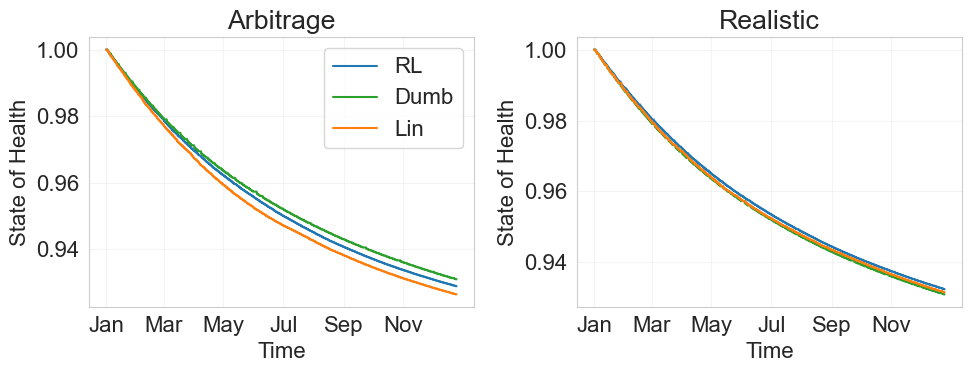

In [18]:
import pandas as pd
import matplotlib.dates as mdates

# Create a date range from Jan to Dec
# Create a date range from Jan to Dec with a 15-minute resolution
date_range = pd.date_range(start="2023-01-01", end="2023-12-31", freq='15min')

# Check if the lengths match
#print(len(date_range) == len(rl_ut_arb))  # should print True

# Continue with the rest of the code...

# Create a figure
fig, ax = plt.subplots(1,2, figsize=(10,4))

# Rescale the index of the dataframes to match the date range
rescaled_log_RL = rl_ut_arb.copy()
rescaled_log_RL.index = date_range[:len(rl_ut_arb)]
rescaled_dumb_log = dumb_ut_arb.copy()
rescaled_dumb_log.index = date_range[:len(dumb_ut_arb)]
rescaled_lin_log = lin_ut_arb.copy()
rescaled_lin_log.index = date_range[:len(lin_ut_arb)]

# Plot the data
ax[0].plot(rescaled_log_RL.index, rescaled_log_RL['SOH'], label='RL', color='#1f77b4')
ax[0].plot(rescaled_dumb_log.index, rescaled_dumb_log['SOH'], label='Dumb', color='#2ca02c')
ax[0].plot(rescaled_lin_log.index, rescaled_lin_log['SOH'], label='Lin', color='#ff7f0e')


# Set the title and labels
ax[0].set_title('Arbitrage')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('State of Health')
ax[0].legend()

ax[0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax[0].set_xticklabels(ax[0].get_xticklabels()[0:12][::2])[0:12]
ax[0].set_xticks(ax[0].get_xticks()[0:12][::2])[0:12]
ax[0].grid(alpha=0.2)

rescaled_log_RL = rl_ut_real.copy()
rescaled_log_RL.index = date_range[:len(rl_ut_real)]
rescaled_dumb_log = dumb_ut_real.copy()
rescaled_dumb_log.index = date_range[:len(dumb_ut_real)]
rescaled_lin_log = lin_ut_real.copy()
rescaled_lin_log.index = date_range[:len(lin_ut_real)]


# Plot the data
ax[1].plot(rescaled_log_RL.index, rescaled_log_RL['SOH'], label='RL', color='#1f77b4')
ax[1].plot(rescaled_dumb_log.index, rescaled_dumb_log['SOH'], label='Dumb', color='#2ca02c')
ax[1].plot(rescaled_lin_log.index, rescaled_lin_log['SOH'], label='Lin', color='#ff7f0e')


# Set the title and labels
ax[1].set_title('Realistic')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('State of Health')
ax[1].legend()
ax[1].grid(alpha=0.2)

ax[1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax[1].set_xticklabels(ax[1].get_xticklabels()[0:12][::2])[0:12]
ax[1].set_xticks(ax[1].get_xticks()[0:12][::2])[0:12]

ax[1].get_legend().remove()

# Show the plot
plt.tight_layout()
plt.savefig("ut_soh_rl_lin_dumb.pdf")
plt.show()

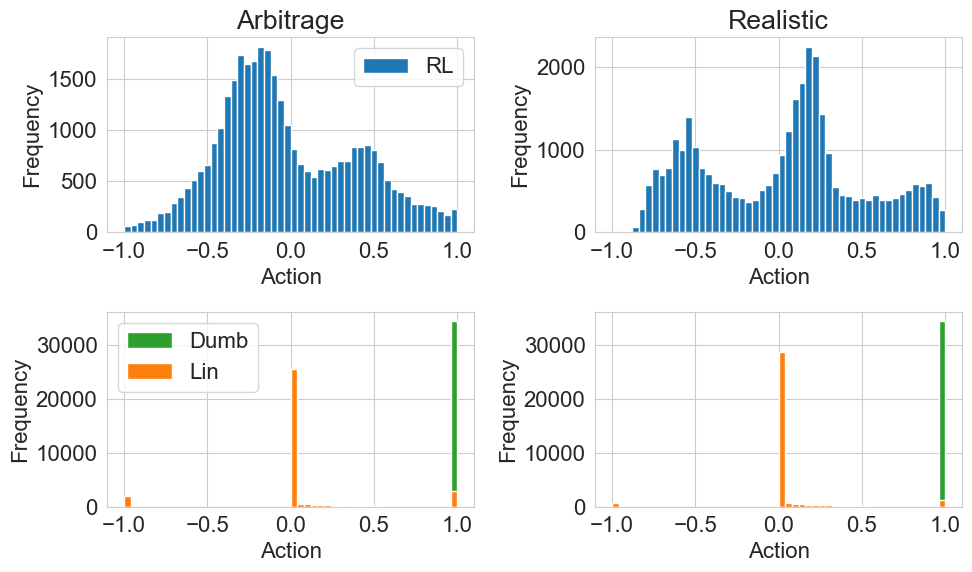

In [19]:


# Create a figure with two subplots side by side
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Plot the distribution of actions for the RL-based strategy on the first subplot
axs[0][0].hist(rl_ut_arb['Action'], bins=50, color='#1f77b4')#, edgecolor='black')
axs[0][0].set_title('Arbitrage')
axs[0][0].set_xlabel('Action')
axs[0][0].set_ylabel('Frequency')
axs[0][0].legend(["RL"])

# Plot the distribution of actions for the dumb strategy on the second subplot
axs[1][0].hist(dumb_ut_arb['Action'], bins=25, color='#2ca02c')#, edgecolor='black')
#axs[1].hist(night_ut_arb['Action'].apply(lambda x: x[0]), bins=50, color='green', edgecolor='black')
#axs[1].hist(dist_ut_arb['Action'].apply(lambda x: x[0]), bins=50, color='orange', edgecolor='black')
axs[1][0].hist(lin_ut_arb['Action'].apply(lambda x: x[0]), bins=50, color='#ff7f0e')#, edgecolor='black')

axs[1][0].set_xlabel('Action')
axs[1][0].set_ylabel('Frequency')
axs[1][0].legend(["Dumb", "Lin"])

axs[0][1].set_title('Realistic')
axs[0][1].hist(rl_ut_real['Action'], bins=50, color='#1f77b4')#, edgecolor='black')
axs[0][1].set_xlabel('Action')
axs[0][1].set_ylabel('Frequency')

# Plot the distribution of actions for the dumb strategy on the second subplot
axs[1][1].hist(dumb_ut_real['Action'], bins=25, color='#2ca02c')#, edgecolor='black')
#axs[1].hist(night_ut_arb['Action'].apply(lambda x: x[0]), bins=50, color='green', edgecolor='black')
#axs[1].hist(dist_ut_arb['Action'].apply(lambda x: x[0]), bins=50, color='orange', edgecolor='black')
axs[1][1].hist(lin_ut_real['Action'].apply(lambda x: x[0]), bins=50, color='#ff7f0e')#, edgecolor='black')

axs[1][1].set_xlabel('Action')
axs[1][1].set_ylabel('Frequency')


plt.tight_layout()
plt.savefig("ppo_ut_act_dist_lin_dumb.pdf")

plt.show()


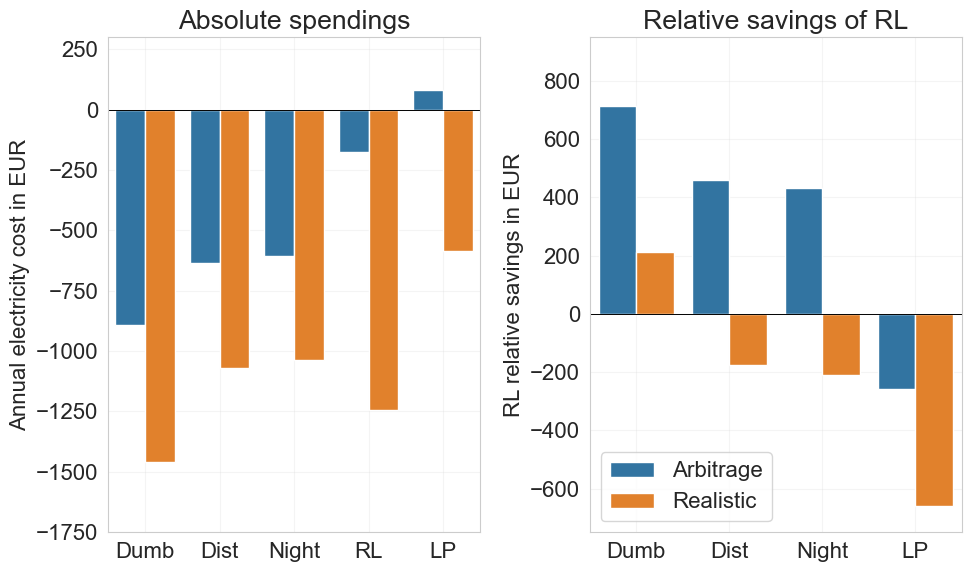

In [16]:
(fig, ax) = plt.subplots(1,2, figsize=(10,6))
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_ut, ax=ax[0])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=rel_cashflow_comp_ut, ax=ax[1])

ax[0].set_ylim([-1750, 300])
ax[0].grid(alpha=0.2)
ax[0].title.set_text("Absolute spendings")
ax[0].axhline(0, color='black', linewidth=0.7)
ax[0].get_legend().remove()
ax[0].set_ylabel("Annual electricity cost in EUR")
ax[0].set_xlabel("")

ax[1].set_ylim([-750, 950])
ax[1].grid(alpha=0.2)
ax[1].legend(loc="lower left")
ax[1].title.set_text("Relative savings of RL")
ax[1].axhline(0, color='black', linewidth=0.7)
ax[1].set_ylabel("RL relative savings in EUR")
#ax[1].get_legend().remove()
ax[1].set_xlabel("")

plt.tight_layout()
plt.savefig("economics_ut_v4.pdf")
plt.show()

In [19]:
print(lin_ut_arb.loc[lin_ut_arb["SOC violation"] > 0, "SOC violation"].sort_values(ascending=False).reset_index(drop=True).sum())
print(lin_ut_arb.loc[lin_ut_arb["SOC violation"] > 0, "SOC violation"].sort_values(ascending=False).reset_index(drop=True).__len__())

print(lin_ut_real.loc[lin_ut_real["SOC violation"] > 0, "SOC violation"].sort_values(ascending=False).reset_index(drop=True).sum())
print(lin_ut_real.loc[lin_ut_real["SOC violation"] > 0, "SOC violation"].sort_values(ascending=False).reset_index(drop=True).__len__())

35.1157091505859
304
34.95597555025324
304


In [52]:
print("34, 35, 304")

34, 35, 304


In [20]:
soc_lin_ut_arb = pd.DataFrame([lin_ut_arb["Observation"][i][0] for i in range(len(lin_ut_arb))])
soc_lin_ut_real = pd.DataFrame([lin_ut_real["Observation"][i][0] for i in range(len(lin_ut_real))])
soc_rl_ut_arb = pd.DataFrame([rl_ut_arb["Observation"][i][0] for i in range(len(rl_ut_arb))])
soc_rl_ut_real = pd.DataFrame([rl_ut_real["Observation"][i][0] for i in range(len(rl_ut_real))])

In [22]:
soc_lin_ut_arb["date"] = pd.date_range(start=lin_lmd_arb["Time"][0], end=lin_lmd_arb["Time"].iloc[-1], freq="15T")
soc_lin_ut_real["date"] = pd.date_range(start=lin_lmd_arb["Time"][0], end=lin_lmd_arb["Time"].iloc[-1], freq="15T")
soc_rl_ut_arb["date"] = pd.date_range(start=lin_lmd_arb["Time"][0], end=lin_lmd_arb["Time"].iloc[-1], freq="15T")
soc_rl_ut_real["date"] = pd.date_range(start=lin_lmd_arb["Time"][0], end=lin_lmd_arb["Time"].iloc[-1], freq="15T")

     0                date
0  0.0 2020-01-01 15:00:00
1  0.0 2020-01-01 15:15:00
2  0.0 2020-01-01 15:30:00
3  0.0 2020-01-01 15:45:00
4  0.0 2020-01-01 16:00:00


In [23]:
soc_lin_ut_arb.to_csv("soc_lin_arb_ut.csv")

In [24]:
soc_rl_ut_arb.to_csv("soc_rl_arb_ut.csv")

In [25]:
soc_lin_ut_real.to_csv("soc_lin_real_ut.csv")
soc_rl_ut_real.to_csv("soc_rl_real_ut.csv")


In [42]:
rl_ut_arb["Grid overloading"].sum()

0.0

In [44]:
soc_lin_ut_arb

,0,date
0,0.000000e+00,2020-01-01 15:00:00
1,0.000000e+00,2020-01-01 15:15:00
2,0.000000e+00,2020-01-01 15:30:00
3,0.000000e+00,2020-01-01 15:45:00
4,0.000000e+00,2020-01-01 16:00:00
...,...,...
34394,-1.387779e-17,2020-12-24 21:30:00
34395,-1.387779e-17,2020-12-24 21:45:00
34396,-1.387779e-17,2020-12-24 22:00:00
34397,-1.387779e-17,2020-12-24 22:15:00


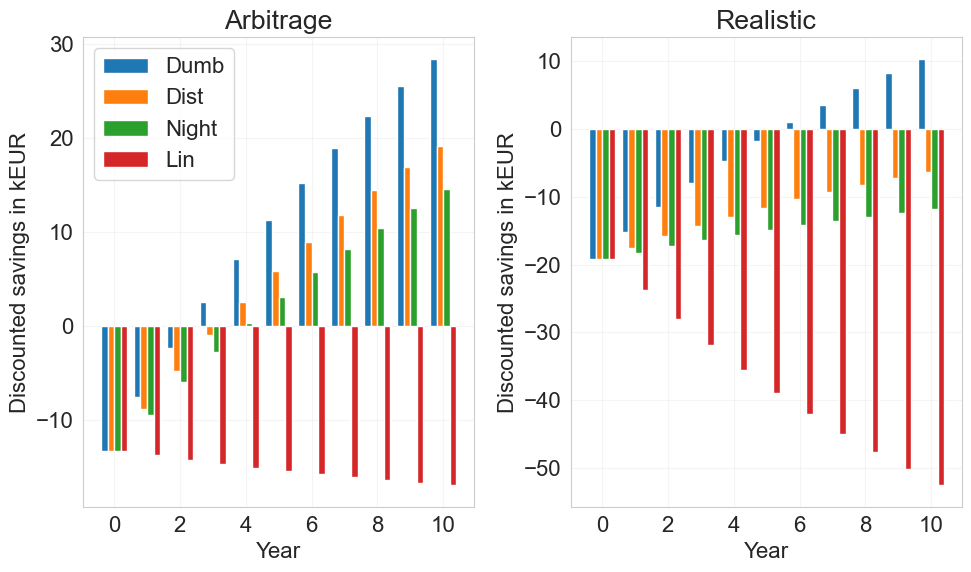

In [16]:
# Importing the required libraries
import matplotlib.pyplot as plt
import numpy as np

# Data for the "Arbitrage" scenario
years = np.arange(0, 11)
arbitrage_dumb = np.divide([-13236, -7584.837209, -2327.94159, 2562.19387, 7111.157088, 11342.75078, 15279.117, 18940.85303, 22347.1191, 25515.73869, 28463.29181],1000)
arbitrage_dist = np.divide([-13236, -8840.651163, -4751.95457, -948.5158791, 2589.566624, 5880.806162, 8942.424337, 11790.44124, 14439.7593, 16904.24121, 19196.78252],1000)
arbitrage_night = np.divide([-13236, -9468.55814, -5963.96106, -2703.870754, 328.7713921, 3149.833853, 5774.078003, 8215.235352, 10486.0794, 12598.49246, 14563.52787],1000)
arbitrage_lin = np.divide([-13236, -13738.32558, -14205.60519, -14640.2839, -15044.63619, -15420.77785, -15770.67707, -16096.16471, -16398.94392, -16680.59899, -16942.60372],1000)

# Data for the "Realistic" scenario
realistic_dumb = np.divide([-19236, -15217.39535, -11479.15846, -8001.728804, -4766.910515, -1757.777223, 1041.416536, 3645.317708, 6067.551357, 8320.79196, 10416.82973],1000)
realistic_dist = np.divide([-19236, -17477.86047, -15842.38183, -14321.00635, -12905.77335, -11589.27754, -10364.63027, -9225.423503, -8165.696282, -7179.903518, -6262.886993],1000)
realistic_night = np.divide([-19236, -18231.34884, -17296.78962, -16427.4322, -15618.72763, -14866.44431, -14166.64587, -13515.67057, -12910.11216, -12346.80201, -11822.79257],1000)
realistic_lin = np.divide([-19236, -23756.93023, -27962.44673, -31874.5551, -35513.72567, -38899.00062, -42048.0936, -44977.48242, -47702.49528, -50237.39095, -52595.43345],1000)

# Function to create a bar plot
def create_plot(ax, data, title, colors):
    width = 0.2
    ax.bar(years - width*1.5, data[0], width, label='Dumb', color=colors[0])
    ax.bar(years - width/2, data[1], width, label='Dist', color=colors[1])
    ax.bar(years + width/2, data[2], width, label='Night', color=colors[2])
    ax.bar(years + width*1.5, data[3], width, label='Lin', color=colors[3])
    ax.set_xlabel('Year')
    ax.set_xticks(years[::2])
    ax.set_ylabel('Discounted savings in kEUR')
    ax.set_title(title)
    ax.grid(True, alpha=0.2)


# Define the colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a subplot for both scenarios
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot the "Arbitrage" scenario
create_plot(axs[0], [arbitrage_dumb, arbitrage_dist, arbitrage_night, arbitrage_lin], 'Arbitrage', colors)

# Plot the "Realistic" scenario
create_plot(axs[1], [realistic_dumb, realistic_dist, realistic_night, realistic_lin], 'Realistic', colors)

axs[0].legend()


# Adjust layout
plt.tight_layout()
#plt.savefig("npv_ct.pdf")
plt.show()

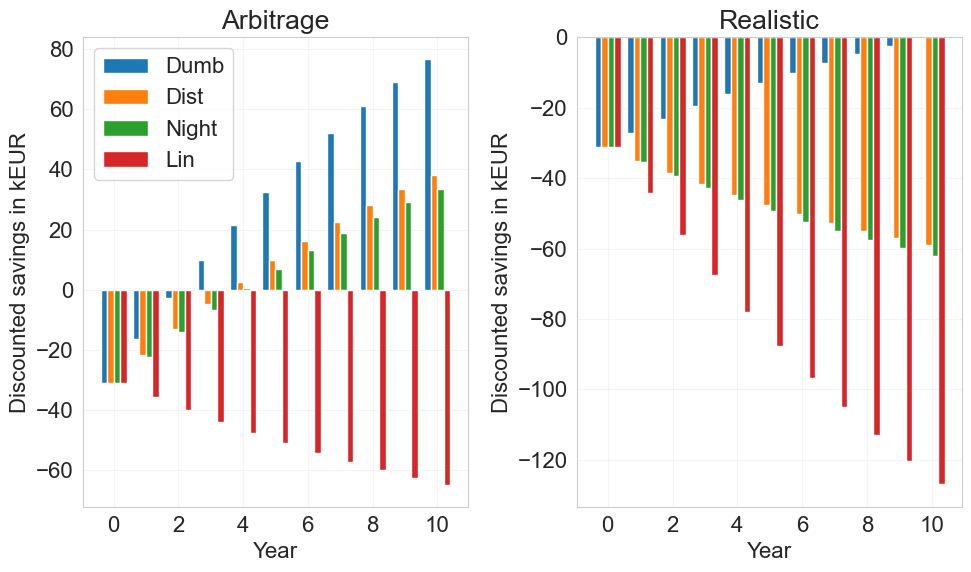

In [17]:
# Updated Data for the "Arbitrage" scenario
arbitrage_dumb_updated = np.divide([-31216, -16564.8372093023, -2935.84856679286, 9742.28040298339, 21535.8887469613, 32506.6872064756, 42712.0811223029, 52205.4708114446, 61036.5309873903, 69251.4706859445, 76893.2750566925], 1000)
arbitrage_dist_updated = np.divide([-31216, -21797.3953488372, -13035.9026500811, -4885.67688379639, 2695.9284801894, 9748.58463273433, 16309.1950071947, 22412.0883787858, 28089.1984918938, 33370.23115525, 38282.8196793023], 1000)
arbitrage_night_updated = np.divide([-31216, -22425.3023255814, -14247.9091400757, -6641.03175820997, 435.133248176776, 7017.61232388537, 13140.8486733817, 18836.8824868667, 24135.5185924342, 29064.4824115667, 33649.5650340155], 1000)
arbitrage_lin_updated = np.divide([-31216, -35820.6511627907, -40104.0475932937, -44088.6024123662, -47795.1650347593, -51243.1302648923, -54450.5397812952, -57434.1765407397, -60209.652596037, -62791.4907870111, -65193.2007321034], 1000)

# Updated Data for the "Realistic" scenario
realistic_dumb_updated = np.divide([-31216, -27029.9534883721, -23135.9567333694, -19513.6341705762, -16144.0317865825, -13009.517941007, -10093.6911079135, -7381.29405387298, -4858.13400360277, -2511.00837544444, -327.635698087847], 1000)
realistic_dist_updated = np.divide([-31216, -34983.4418604651, -38488.0389399675, -41748.1292464814, -44780.7713920758, -47601.8338530937, -50226.0780028779, -52667.2353515143, -54938.0793967575, -57050.4924621, -59015.5278717209], 1000)
realistic_night_updated = np.divide([-31216, -35402.0465116279, -39296.0432666306, -42918.3658294238, -46287.9682134175, -49422.482058993, -52338.3088920865, -55050.705946127, -57573.8659963972, -59920.9916245556, -62104.3643019122], 1000)
realistic_lin_updated = np.divide([-31216, -44192.7441860465, -56264.1341265549, -67493.3340712139, -77939.1014615943, -87656.0943828784, -96695.1575654683, -105103.588432994, -112925.384588831, -120201.474036122, -126969.929335928], 1000)

# Create a subplot for both updated scenarios
fig_updated, axs_updated = plt.subplots(1, 2, figsize=(10, 6))

# Plot the "Arbitrage" scenario with updated data
create_plot(axs_updated[0], [arbitrage_dumb_updated, arbitrage_dist_updated, arbitrage_night_updated, arbitrage_lin_updated], 'Arbitrage', colors)

# Plot the "Realistic" scenario with updated data
create_plot(axs_updated[1], [realistic_dumb_updated, realistic_dist_updated, realistic_night_updated, realistic_lin_updated], 'Realistic', colors)

axs_updated[0].legend()

# Adjust layout
plt.tight_layout()
plt.savefig("npv_ut.pdf")
plt.show()
